In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('insuranceFraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
import numpy as np
df=df.replace('?',np.nan)

In [6]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [7]:
# dropping the unnecessary columns
df.drop(columns=cols_to_drop,inplace=True)

In [8]:
# checking for missing values
df.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [20]:
print(df[['collision_type', 'property_damage', 'police_report_available']].head())
print(df.isnull().sum())  # Check the number of missing values
print(df.dtypes)  # Check the data types of the columns


    collision_type property_damage police_report_available
0   Side Collision             YES                     YES
1              NaN             NaN                     NaN
2   Rear Collision              NO                      NO
3  Front Collision             NaN                      NO
4              NaN              NO                      NO
months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage 

In [21]:
# from sklearn.impute import SimpleImputer

# # Initialize the imputer with the strategy you want, e.g., 'most_frequent' for categorical data
# imputer = SimpleImputer(missing_values = np.nan,strategy='most_frequent')

# # Impute the missing values in each column
# df['collision_type'] = imputer.fit_transform(df[['collision_type']])
# df['property_damage'] = imputer.fit_transform(df[['property_damage']])
# df['police_report_available'] = imputer.fit_transform(df[['police_report_available']])



In [22]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

We have 12 categorical features : ['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available', 'fraud_reported']


In [24]:
#2.1 Import Data and Required Packages
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


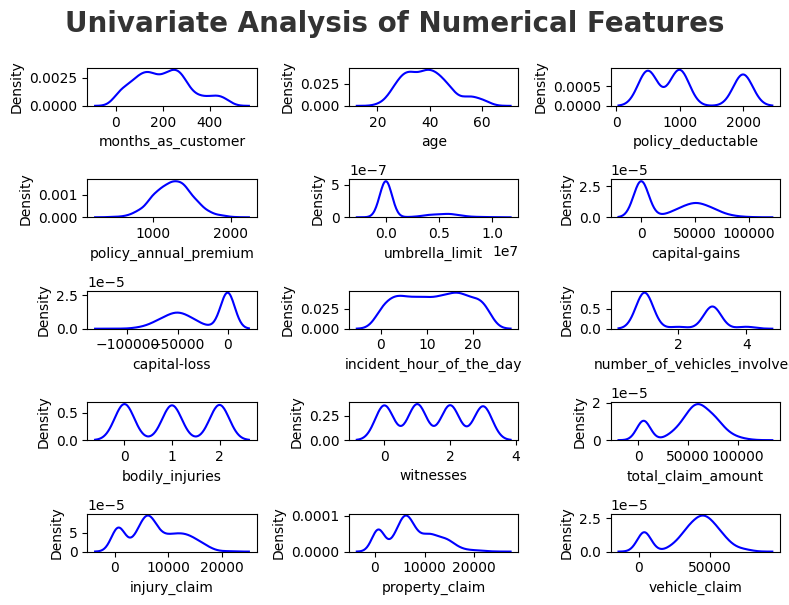

In [26]:
plt.figure(figsize=(8, 6))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

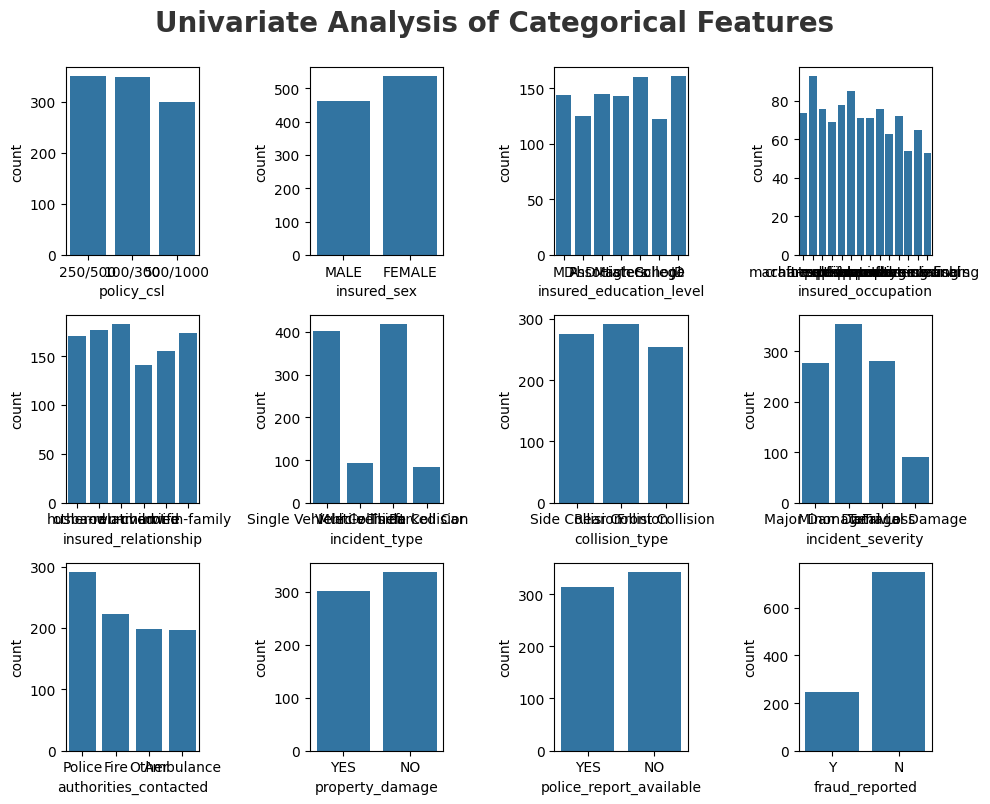

In [27]:
# categorical columns

plt.figure(figsize=(10, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 4, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    

Check Multicollinearity in Numerical features

In [28]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 6 discrete features : ['policy_deductable', 'umbrella_limit', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses']

We have 9 continuous_features : ['months_as_customer', 'age', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


<Axes: >

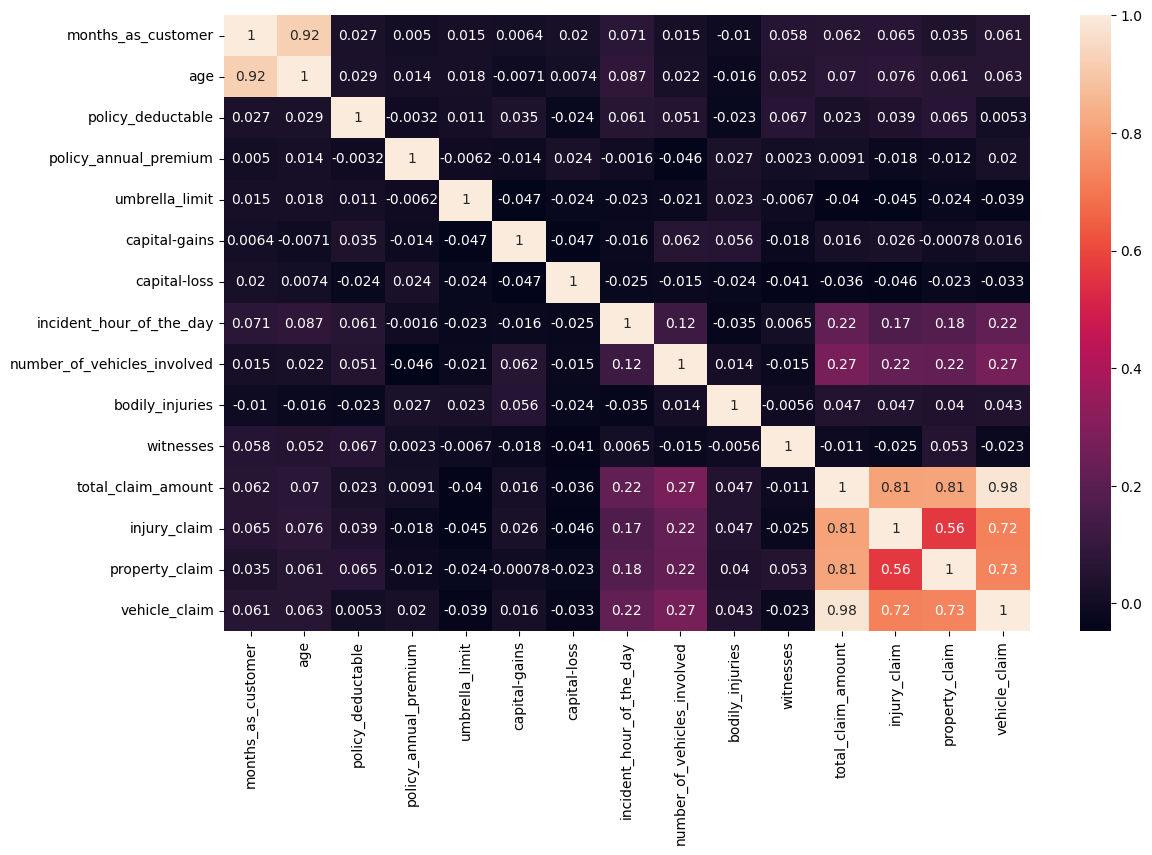

In [30]:
plt.figure(figsize=(13,8))
sns.heatmap(df[numeric_features].corr(), annot=True )

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column. Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

Check Multicollinearity for Categorical features
#### Here we test correlation of Categorical columns with Target column i.e fraud_reported

In [31]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['fraud_reported'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,policy_csl,Fail to Reject Null Hypothesis
1,insured_sex,Fail to Reject Null Hypothesis
2,insured_education_level,Fail to Reject Null Hypothesis
3,insured_occupation,Fail to Reject Null Hypothesis
4,insured_relationship,Fail to Reject Null Hypothesis
5,incident_type,Reject Null Hypothesis
6,collision_type,Fail to Reject Null Hypothesis
7,incident_severity,Reject Null Hypothesis
8,authorities_contacted,Reject Null Hypothesis
9,property_damage,Fail to Reject Null Hypothesis


Here policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,collision_type,property_damage,
police_report_available fails to Rejects Null Hypothesis which means it doesn't correlate with target column

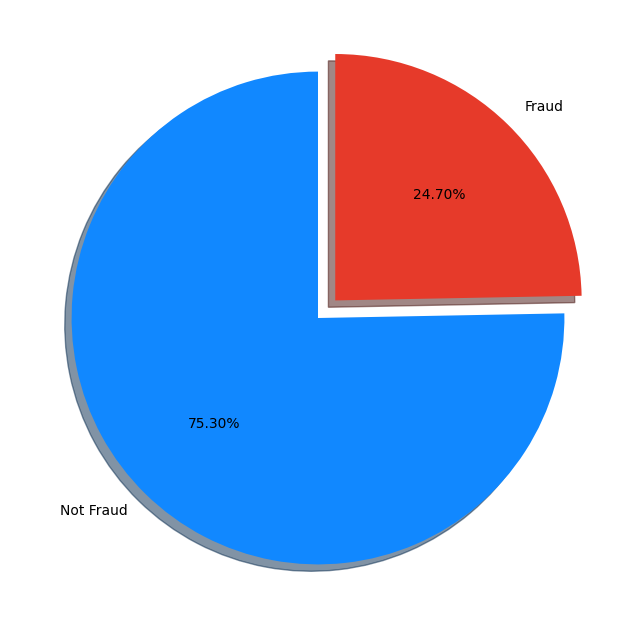

In [32]:
percentage = df.fraud_reported.value_counts(normalize=True)*100
labels = ["Not Fraud","Fraud"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

1. list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year'].

2. Here policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,collision_type,property_damage,
police_report_available fails to Rejects Null Hypothesis which means it doesn't correlate with target column

3. From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column. Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

4. Capital-loss and umbrella limit are skewed data